## 10 Foods classification By Alan Altonchi
**Day 4 of learning how to use TensorFlow and what Machine Learning is**

Dataset: https://www.kaggle.com/datasets/dansbecker/food-101

This is a **Multi-Class Classification**, the inputs are RGB images, the output is what food the model predicts the image to be.

We will make use of Transfer Learning and and try three different **Feature Extraction** models:

* **EfficientNet** https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1
* **EfficientNet V2** https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b0/feature_vector/2
* **ResNet** https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5

**Introduction:** Hello, my name is Alan, I am a passionate self-taught programmer that loves learning new things. This is my journey as I'm learning about **Machine Learning** and how to make use of its subfield **Deep Learning**. I will do so by learning how to use **TensorFlow** from scratch.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard, ModelCheckpoint
from keras import Sequential
import tensorflow_hub as hub
from keras.layers import Dense
from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy
train_dir = "datasets/10_food_classes_all_data/train/"
val_dir = "datasets/10_food_classes_all_data/test/"
IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

In [182]:
train_datagen = ImageDataGenerator(rescale=1./225)
val_datagen = ImageDataGenerator(rescale=1./225)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMAGE_SHAPE,
                                               batch_size=BATCH_SIZE,
                                               class_mode='categorical')

val_data = val_datagen.flow_from_directory(val_dir,
                                               target_size=IMAGE_SHAPE,
                                               batch_size=BATCH_SIZE,
                                               class_mode='categorical')

class_names = [
    'Chicken Curry',
    'Chicken Wings',
    'Fried Rice',
    'Grilled Salmon',
    'Hamburger',
    'Ice Cream',
    'Pizza',
    'Ramen',
    'Steak',
    'Sushi'
    ]

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## Callbacks

In [24]:
import datetime

def create_tensor_callback(dir_name, experiment_name):
    log_dir = f'{dir_name}/{experiment_name}/{datetime.datetime.now().strftime("%Y%m%d-%H%M%S")}'
    tensorboard_callback = TensorBoard(log_dir=log_dir)
    print(f"Saving TensorBoard log files to: {log_dir}")
    return tensorboard_callback

## Creating models using TensorFlow Hub

In [76]:
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"
efficientnetv2_url = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b0/feature_vector/2"

In [59]:
def create_model(model_url, num_classes=10):
    feature_extractor_layer = hub.KerasLayer(model_url,
                                            trainable=False,
                                            name="feature_extraction_layer",
                                            input_shape=IMAGE_SHAPE+(3,))
    model = Sequential([
        feature_extractor_layer,
        Dense(num_classes, activation='softmax')
    ])
    model.compile(loss=CategoricalCrossentropy(),
               optimizer=Adam(),
               metrics=['accuracy'])
    return model

In [ ]:
%tensorboard --logs='logs'

In [46]:
resnet_model = create_model(resnet_url)

history_resnet = resnet_model.fit(train_data,
                                  epochs=5,
                                  batch_size=32,
                                  steps_per_epoch=len(train_data),
                                  validation_data=val_data,
                                  validation_steps=len(val_data),
                                  callbacks=[create_tensor_callback('logs','resnet')])

Saving TensorBoard log files to: logs/resnet/20220613-225614
Epoch 1/5
24/24 [==============================] - 7s 230ms/step - loss: 1.9282 - accuracy: 0.3440 - val_loss: 1.2660 - val_accuracy: 0.5888
Epoch 2/5
24/24 [==============================] - 5s 214ms/step - loss: 0.9342 - accuracy: 0.7240 - val_loss: 0.8838 - val_accuracy: 0.7200
Epoch 3/5
24/24 [==============================] - 5s 206ms/step - loss: 0.6427 - accuracy: 0.8213 - val_loss: 0.7933 - val_accuracy: 0.7360
Epoch 4/5
24/24 [==============================] - 5s 203ms/step - loss: 0.4881 - accuracy: 0.8707 - val_loss: 0.7505 - val_accuracy: 0.7480
Epoch 5/5
24/24 [==============================] - 5s 206ms/step - loss: 0.4005 - accuracy: 0.9053 - val_loss: 0.7091 - val_accuracy: 0.7596


In [75]:
efficientnet_model = create_model(efficientnet_url)

history_efficientnet = efficientnet_model.fit(train_data,
                                  epochs=10,
                                  batch_size=32,
                                  steps_per_epoch=len(train_data),
                                  validation_data=val_data,
                                  validation_steps=len(val_data),
                                  callbacks=[create_tensor_callback('logs','efficientnet')])

Saving TensorBoard log files to: logs/efficientnet/20220613-233200
Epoch 1/10
24/24 [==============================] - 13s 346ms/step - loss: 1.8782 - accuracy: 0.4213 - val_loss: 1.3339 - val_accuracy: 0.7152
Epoch 2/10
24/24 [==============================] - 7s 308ms/step - loss: 1.1007 - accuracy: 0.7547 - val_loss: 0.9043 - val_accuracy: 0.8148
Epoch 3/10
24/24 [==============================] - 7s 316ms/step - loss: 0.7910 - accuracy: 0.8360 - val_loss: 0.7299 - val_accuracy: 0.8348
Epoch 4/10
24/24 [==============================] - 7s 296ms/step - loss: 0.6345 - accuracy: 0.8600 - val_loss: 0.6345 - val_accuracy: 0.8520
Epoch 5/10
24/24 [==============================] - 7s 305ms/step - loss: 0.5410 - accuracy: 0.8827 - val_loss: 0.5837 - val_accuracy: 0.8532
Epoch 6/10
24/24 [==============================] - 8s 327ms/step - loss: 0.4690 - accuracy: 0.9053 - val_loss: 0.5439 - val_accuracy: 0.8656
Epoch 7/10
24/24 [==============================] - 7s 310ms/step - loss: 0.4127

In [81]:
efficientnetv2_model = create_model(efficientnetv2_url)

history_efficientnetv2 = efficientnetv2_model.fit(train_data,
                                  epochs=5,
                                  batch_size=32,
                                  steps_per_epoch=len(train_data),
                                  validation_data=val_data,
                                  validation_steps=len(val_data),
                                  callbacks=[create_tensor_callback('logs','efficientnetv2'), 
                                             ModelCheckpoint('bestModel.h5',monitor='val_accuracy',save_best_only=True,mode='max')])

Saving TensorBoard log files to: logs/efficientnetv2/20220613-233811
Epoch 1/5
235/235 [==============================] - 34s 132ms/step - loss: 0.7071 - accuracy: 0.7795 - val_loss: 0.3008 - val_accuracy: 0.9124
Epoch 2/5
235/235 [==============================] - 29s 123ms/step - loss: 0.3727 - accuracy: 0.8824 - val_loss: 0.2533 - val_accuracy: 0.9220
Epoch 3/5
235/235 [==============================] - 29s 125ms/step - loss: 0.2982 - accuracy: 0.9087 - val_loss: 0.2586 - val_accuracy: 0.9164
Epoch 4/5
235/235 [==============================] - 31s 133ms/step - loss: 0.2528 - accuracy: 0.9209 - val_loss: 0.2315 - val_accuracy: 0.9248
Epoch 5/5
235/235 [==============================] - 32s 135ms/step - loss: 0.2152 - accuracy: 0.9352 - val_loss: 0.2358 - val_accuracy: 0.9264


In [184]:
efficientnetv2_model.evaluate(val_data)

79/79 [==============================] - 9s 117ms/step - loss: 0.2358 - accuracy: 0.9264


[0.23577983677387238, 0.9264000058174133]

In [187]:
efficientnetv2_model.fit(train_data,
                                  epochs=1,
                                  batch_size=32,
                                  steps_per_epoch=len(train_data),
                                  validation_data=val_data,
                                  validation_steps=len(val_data),
                                  callbacks=[create_tensor_callback('logs','efficientnetv2'), 
                                             ModelCheckpoint('bestModel.h5',monitor='val_accuracy',save_best_only=True,mode='max')])

Saving TensorBoard log files to: logs/efficientnetv2/20220614-001714
235/235 [==============================] - 40s 170ms/step - loss: 0.1076 - accuracy: 0.9755 - val_loss: 0.2511 - val_accuracy: 0.9180


In [204]:
from keras.utils import load_img
import matplotlib.pyplot as plt
import os
import math
def process_image(img):
    image = load_img('datasets\\food_vision\custom\\'+img,
                    target_size=(224, 224))
    
    plt.imshow(image)
    image = tf.cast(tf.constant(image),tf.float32) / 255.
    image = tf.expand_dims(image,axis=0)
    return image

def predict_image(model, img):
    image = process_image(img)
    pred = model.predict(image, verbose=0)
    plt.title(f'{class_names[tf.argmax(pred[0])]}', fontsize=13)

def run_tests(model):
    plt.figure(figsize=(20,30))
    plt.subplots_adjust(left=0.4)
    plt.axis('off')
    counter = sum(1 for _ in os.listdir("datasets\\food_vision\custom\\"))
    for i, filename in enumerate(os.listdir("datasets\\food_vision\custom\\")):

        ax = plt.subplot(math.ceil(counter/4),4,i+1)
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        predict_image(model, filename)
    

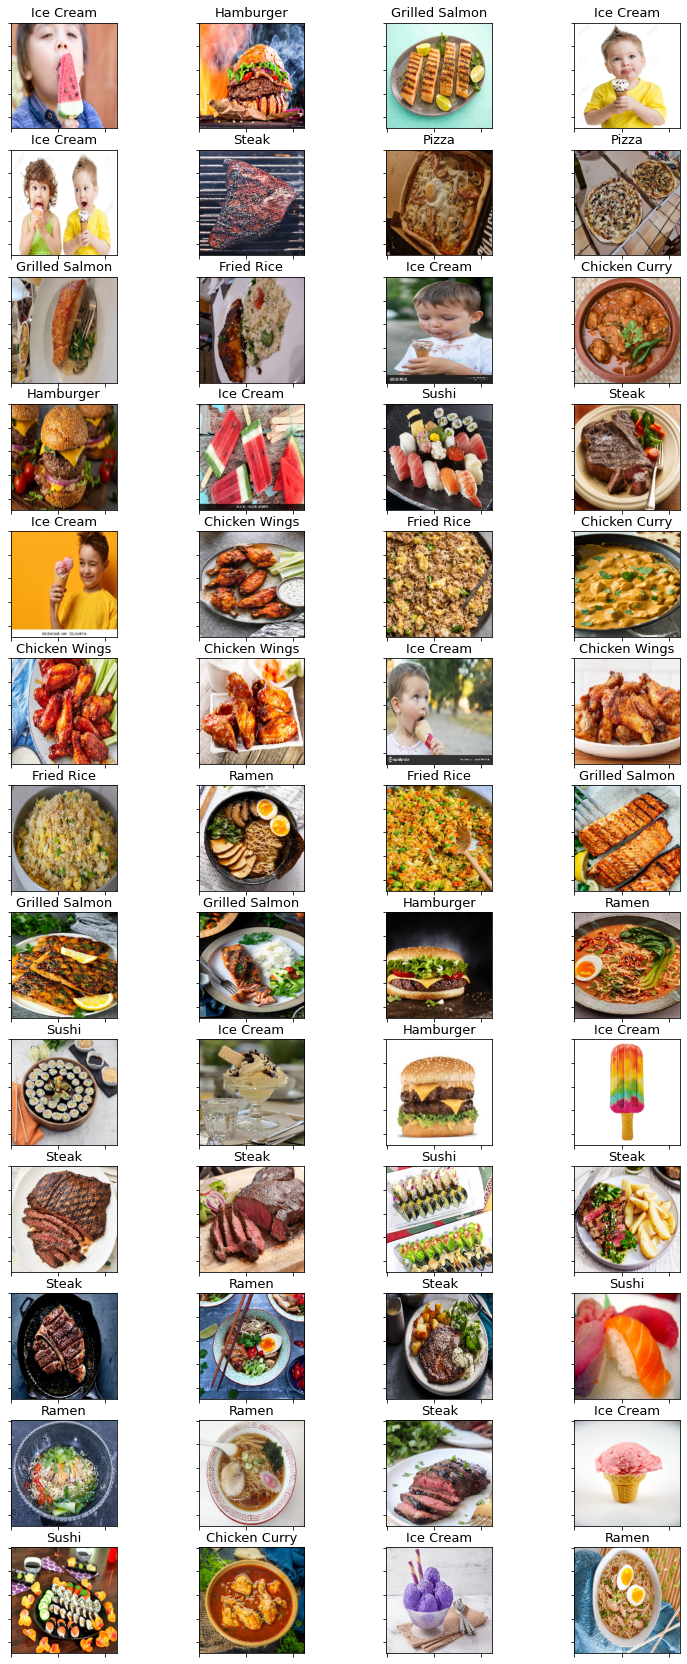

In [205]:
run_tests(efficientnetv2_model)